In this task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours studied.

This is a simple linear regression task as it involves just two variables.

### Importing the required libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Reading the data

In [ ]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print(data.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


### Data Visualization

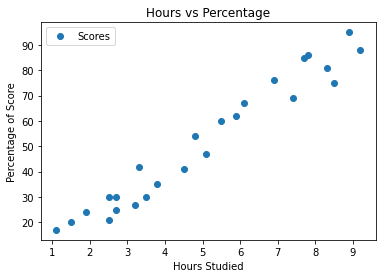

In [ ]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Score')
plt.show()

The above graph shows that there is a positive linear relation between the number of hours studied and percentage of score.

### Data Preprocessing
Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### Model Training

In [ ]:
# Splitting the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
# Training the algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the Line of Regression

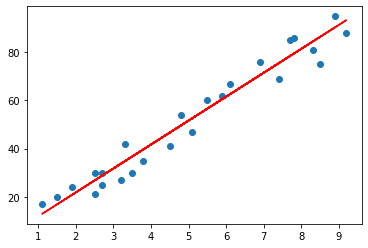

In [ ]:
# Plotting the best fit line
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line, color = 'red');
plt.show()

### Making Predictions

In [ ]:
# Model Prediction
pred = lr.predict(x_test)

### Comparing the actual and predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred}) 
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [ ]:
#Estimating training and test score
print("Training Score:",lr.score(x_train,y_train))
print("Test Score:",lr.score(x_test,y_test))

Training Score: 0.9484509249326872
Test Score: 0.9367661043365056


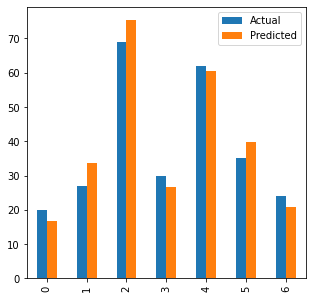

In [ ]:
# Plotting the Bar Graph to depict the difference between the actual and predicted values
df.plot(kind='bar', figsize=(5,5))
plt.show()

### Testing with own data

In [ ]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No. of Hours = ",hours)
print("Predicted Score = ",own_pred[0])

No. of Hours =  9.25
Predicted Score =  93.89272889341652


### Evaluating the Model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R-2:', metrics.r2_score(y_test,pred))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805
R-2: 0.9367661043365056


R-2 is the score of the model fit.